# 1. Dataset & DataLoader

- Dataset은 샘플과 정답(label)을 저장
- Dataloader는 Dataset을 샘플에 쉽게 접근할 수 있도록 순회 가능한 객체로 감싼다

## 1. 데이터셋 불러오기

In [1]:
import torch
from torch.utils.data import Dataset,DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
training_data = datasets.FashionMNIST(root = 'data',
                                     train = True,
                                     download = True,
                                     transform = ToTensor())

test_data = datasets.FashionMNIST(root = 'data',
                                 train = False,
                                 download = True,
                                 transform = ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



## 2. 데이터셋 순회하고 시각화하기

In [3]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"}

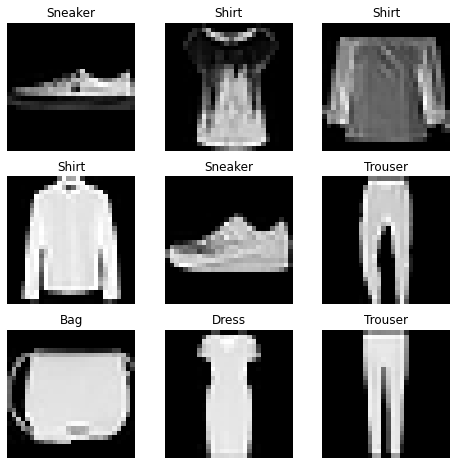

In [5]:
figure = plt.figure(figsize = (8,8))
cols, rows = 3,3

for i in range(1,cols*rows +1) :
    sample_idx = torch.randint(len(training_data),size = (1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows,cols,i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(),cmap = 'gray')
    
plt.show()

## 3. 파일에서 사용자 정의 데이터셋 만들기

In [22]:
import os
import pandas as pd
from torchvision.io import read_image

In [23]:
class CustomImageDataset(Dataset) :
    def __init__(self, annotations_file, img_dir, transform = None, target_transfrom = None) :
        self.img_labels = pd.read_csv(annotations_file,names = ['file_name','label'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transfrom = target_transfrom
    
    def __len__(self) :
        return len(self.img_labels)
    
    def __getitem__(self,idx) :
        img_path = os.path.join(self.img_dir,self.img_labels.iloc[idx,0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx,1]
        if self.transform :
            image = self.transform(image)
        if self.target_transfrom :
            label = self.target_transfrom(label)
        return image, label

## 4. DataLoader로 학습용 데이터 준비하기

In [24]:
train_dataloader = DataLoader(training_data, batch_size = 64,
                             shuffle = True)

test_dataloader = DataLoader(test_data, batch_size = 64, 
                            shuffle = True)

## 5. DataLoader를 통해 순회하기(iterate)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


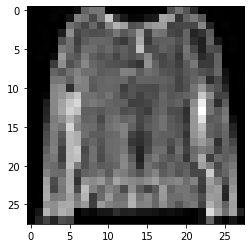

Label: 6


In [25]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# 2. Transform

- 데이터 조작하고 학습에 적합하게 만들어준다

In [26]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

In [27]:
ds = datasets.FashionMNIST(root = 'data',
                          train = True,
                          download = True,
                          transform = ToTensor(),
                          target_transform = 
                           Lambda(lambda y : torch.zeros(10,dtype = torch.float).scatter_(0,torch.tensor(y),value = 1))
                          )

#### Lambda 변형 

- 사용자 정의 람다 함수 적용
- 여기서는 먼저 크기가 10인 0 텐서(zero tensor)를 만들고, scatter_를 호출하여 주어진 정답 y에 해당하는 인덱스에 value = 1을 할당